## Coursera Machine Learning Course Notes

### Simple Linear Regression (SLR)
* $h(x)$ is the hypothesis function. In this case it is SLR
* $j(\theta)$ is the cost function we are trying to minimise. In this case it is MSE
* We can achieve this by finding the partial slope $\frac{\partial j(\theta)}{\partial\theta}$ then updating the parameters $\theta_0$ and $\theta_1$

Hypothesis function and cost function
* $h(x) = \theta_0 + \theta_1x$
* $j(\theta_0,\theta_1) = MSE = \frac{1}{2m}\sum_{i=1}^{m} (\theta_0 + \theta_1x^{(i)} - y^{(i)})^2$

Calculating gradients of the cost function
* $\frac{\partial j(\theta_0,\theta_1)}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^{m} (\theta_0 + \theta_1x^i - y^i)$
* $\frac{\partial j(\theta_0,\theta_1)}{\partial\theta_1} = \frac{1}{m}\sum_{i=1}^{m} (\theta_0 + \theta_1x^i - y^i) x^i$

Updating $\theta$ simultaneously
* $temp_0 := \theta_0 - \alpha \frac{\partial j(\theta_0,\theta_1)}{\partial\theta_0}$
* $temp_1 := \theta_1 - \alpha \frac{\partial j(\theta_0,\theta_1)}{\partial\theta_1}$
* $\theta_0 = temp_0$
* $\theta_1 = temp_1$

Learning rate $\alpha$
* if $\alpha$ is too low, it takes a lot of iterations and may get stuck in a local minimum
* if $\alpha$ is too high, it may fail to converge or diverge (skipping past the local minimum)
* As we approach a local minimum, gradient descent will automatically take smaller steps. So, no need to decrease $\alpha$ over time

Types of gradient descent
* batch uses all training examples (per epoch)
* minibatch uses a portion of the training examples (due to ram issues)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
x_i = [0, 1, 3, 4, 5, 9, 10, 11, 13 ,14]
y_i = [i + np.random.randint(-3,3) for i in x]

In [134]:
theta_0 = 0
theta_1 = 0
y_pred = [theta_0+theta_1*i for i in x_i]

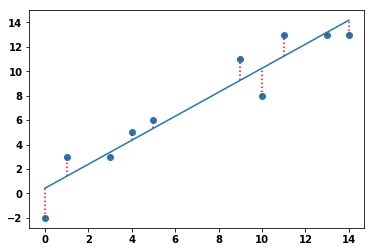

In [2559]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(x_i,y_i)
plt.plot(x_i,y_pred)

# plt.vlines(x=0, ymin=3, ymax=-2)

iteration = 0
for x in x_i:
    y_min = np.min([y_i[iteration],y_pred[iteration]])
    y_max = np.max([y_i[iteration],y_pred[iteration]])
    plt.vlines(x=x, ymin=y_min, ymax=y_max, colors='r',linestyle=':')
    iteration += 1

In [130]:
def error():
    sum = 0
    iteration = 0
    for x in x_i:
        sum += (y_pred[iteration] - y_i[iteration])**2      
        iteration += 1
        
    sum /= len(x_i)
    return sum

In [315]:
error()

4.28697513555709

In [1294]:
def update(theta_0,theta_1,alpha):
    derivative_0,derivative_1 = 0,0
    iteration = 0
    for x in x_i:
        derivative_0 += (y_pred[iteration] - y_i[iteration])
        derivative_1 += (y_pred[iteration] - y_i[iteration])*x
        iteration += 1
        
    theta_0 = theta_0 - alpha * derivative_0
    theta_1 = theta_1 - alpha * derivative_1
    print(theta_0,theta_1)
    return theta_0,theta_1

In [2014]:
theta_0,theta_1 =0,0

In [2558]:
y_pred = [theta_0+theta_1*i for i in x_i]
theta_0,theta_1 = update(theta_0,theta_1,0.002)
print(error())

0.41236191574929254 0.9834789458075751
2.2030175422574225


In [2560]:
from sklearn.linear_model import LinearRegression

In [2566]:
reg = LinearRegression().fit([x_i], y_i)

ValueError: Found input variables with inconsistent numbers of samples: [1, 10]

In [2567]:
x_i

[0, 1, 3, 4, 5, 9, 10, 11, 13, 14]

In [6]:
from matplotlib import pyplot
import numpy, weakref
a = numpy.arange(int(1e3))
fig = pyplot.Figure()
ax  = fig.add_subplot(1, 1, 1)
lines = ax.plot(a)

# l = lines.pop(0)
# wl = weakref.ref(l)  # create a weak reference to see if references still exist
# #                      to this object
# print wl  # not dead
# l.remove()
# print wl  # not dead
# del l
# print wl  # dead  (remove either of the steps above and this is still live)

In [5]:
pyplot.show()

## Matrix
* dim of matrix = row * col
* $A_{ij}$ represents element in row i and col j
* capitals refer to matrices
* lower case scalar and vector

## Octave
``` octave
A = [1,2,3;4,5,6;7,8,9]
v = [1,2,3]
[m,n] = size(A)
dim_A = size(A)
A_23 = A(2,3)
A' %transpose
inv(A) %inverse
help my_func
1==2 %compare
1~=2 %~ is not
1&&0 % AND
1||0 % OR
xor(1,0) % XOR
ls
cd
load my_file % loads data into octave
save my_file my_variable % save data
whos % detailed view
clear my_variable % delete variable
A(1:12) % index 1-12th elements
A*B % dot product
A.*B % elmeent operation
plot(x,y)
hold on
plot(x,y2,'r')
xlabel('')
ylabel('')
title('')
legend('y1','y2')
print -dpng ''
close
subplot(r,c,1)
axis([xmin,xmax,ymin,ymax])
imagesc(A),colorbar,colormap gray;
% for loops
for i=1:10,
i,
end
% while loop
i = 0
while i<10,
i=i+1,
end
% if statement the same
% functions
function [y1,y2] = squareAndCubeThisNumber(x)
y1 = x^2
y2 = x^3
end
>> squareAndCubeThisNumber(3)
y1 =  9
y2 =  27
```

* n = # of features
* $x_1^{i},x_2^{i},x_3^{i}$ represents feature 1,2,3 respectively of the ith index
* $\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m} (\theta^Tx^{(i)} - y^{(i)}) x_j^i$

##### Feature scaling
* I want to see before and after feature scaling
* scaling can cnverge much faster
* want ot get into -1 < $x_i$< 1range
* mean normilisation $x_1 = \frac {size-\mu} {2000}$

##### Choose learning rate $\alpha$
* plot cost function over time (iterations) and it should decrease over time
* automatic convergence, if cost function dcreases less than 10^-3 by one interaction

##### Features and ploynomial regression
* $h_\theta(x) = \theta_0 +\theta_1(size)+\theta_2(size)^2+\theta_3(size)^3$
* $h_\theta(x) = \theta_0 +\theta_1x_1+\theta_2x_2+\theta_3x_3$
* $x_1 = size, x_2=size^2,x_3=size^3, x_4 = \sqrt{size}$
* This substitution is fine, but makes feature scaling even more important

##### Normal Equation
* solved for $\theta$ analytically
* $\theta =(X^TX)^{-1}X^Ty$
* No need for feature scaling


##### Normal vs gradient descent
* gradient need to choose $\alpha$
* GD needs many iterations
* GD works well even when n is large, normal equation is slow if n is very large <10^6
* GD works for generic for specialised eqns


##### Non invertible
* $X^TX$ redundant features (linearly dependent)
* called singular
* too many features m <= n 
    * 10 rows with 100 features
    * delete some features with regularization